<a href="https://colab.research.google.com/github/zahrabashir98/Financial-Indicators/blob/master/fft_of_closes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using FFT to Find the Dominant Frequencies in the Close Signal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.fft import fft, ifft
import seaborn as sns

datafile = "BINANCE_BTCUSDT, 480.csv"
data = pd.read_csv(datafile)
close = data['close']

close.index = pd.to_datetime(close.index)
close_np = close.to_numpy(dtype=None, copy=False)
close_fft = fft(close_np)

##### Finding abs of complex numbers ans subtracting the mean value from them (easier to work with)

In [2]:
abs_close = []
for data in close_fft:
  abs_close.append((abs(data)))
abs_close = np.array(abs_close)

close_mean = abs_close.mean()
print(close_mean)
print(abs_close)
abs_close -= close_mean
print(abs_close)

40267.58832835524
[25852843.61        2601695.74927257  3011221.35070418 ...
   866266.99740534  3011221.35070418  2601695.74927257]
[25812576.02167165  2561428.16094422  2970953.76237583 ...
   825999.40907699  2970953.76237583  2561428.16094422]


##### Visualization

[25812576.02167165  2561428.16094422  2970953.76237583 ...
   825999.40907699  2970953.76237583  2561428.16094422]


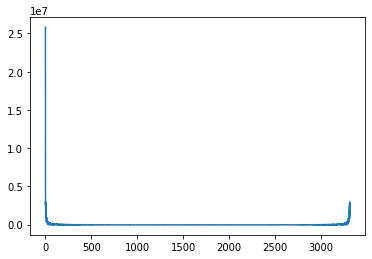

In [3]:
print(abs_close)
plt.plot(abs_close)
plt.show()

[25812576.02167165  2561428.16094422  2970953.76237583 ...
   825999.40907699  2970953.76237583  2561428.16094422]


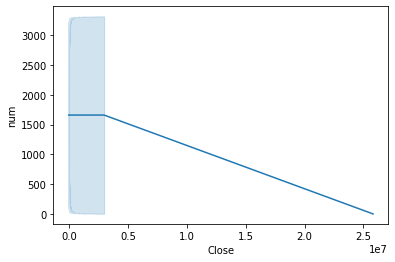

In [8]:
print(abs_close)
a =[i for i in range(len(abs_close))]

data = {'num':[i for i in range(len(abs_close))], 'Close': abs_close}
df = pd.DataFrame(data)
# ax = sns.jointplot(x="Close", y="num", data=df)
b = sns.lineplot(x="Close", y="num", data=df)

In [36]:
print("Top Ten Values:")
a = np.sort(abs_close)
print(a[-10:])
print("\n")
print("Top Ten Indexes:")
b = abs_close.argsort()[-10:][::]
print(b)

Top Ten Values:
[ 1586244.93312548  1968579.87272997  1968579.87272997  2561428.16094422
  2561428.16094422  2624204.32740535  2624204.32740535  2970953.76237583
  2970953.76237583 25812576.02167165]


Top Ten Indexes:
[3309 3310 3311 3312 3313 3314 3315 3317 3316 3318]
